# Time Series

In [47]:
#importing all require library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime # for datetime 
from pandas import Series
%matplotlib inline 

In [48]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

<li>ID is the unique number given to each observation point.
<li>Datetime is the time of each observation.
<li>Count is the passenger count corresponding to each Datetime.

In [49]:
print ('data:')
train.head()
#train.describe()

data:


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


### Making copy of original training and test datasets 

In [50]:
train_original=train.copy()
test_original=test.copy()

In [51]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [52]:
train.index, test.index

(RangeIndex(start=0, stop=18288, step=1),
 RangeIndex(start=0, stop=5112, step=1))

In [53]:
train.dtypes , test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

<li>To make DateTime 
    

In [54]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

In [55]:
for i in (train, test, train_original, test_original):
    i['year']= i.Datetime.dt.year
    i['month']= i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

<li>We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

<li>Values of 5 and 6 represents that the days are weekend.

In [56]:
train['day of week']= train.Datetime.dt.dayofweek

In [57]:
temp= train['Datetime']

Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

In [58]:
def applyer(rows):
    if rows.dayofweek==5 or rows.dayofweek==6:
        return 1
    else: 
        return 0

temp2= train['Datetime'].apply(applyer)
train['weekend']=temp2

In [59]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


#### Let’s look at the time series.

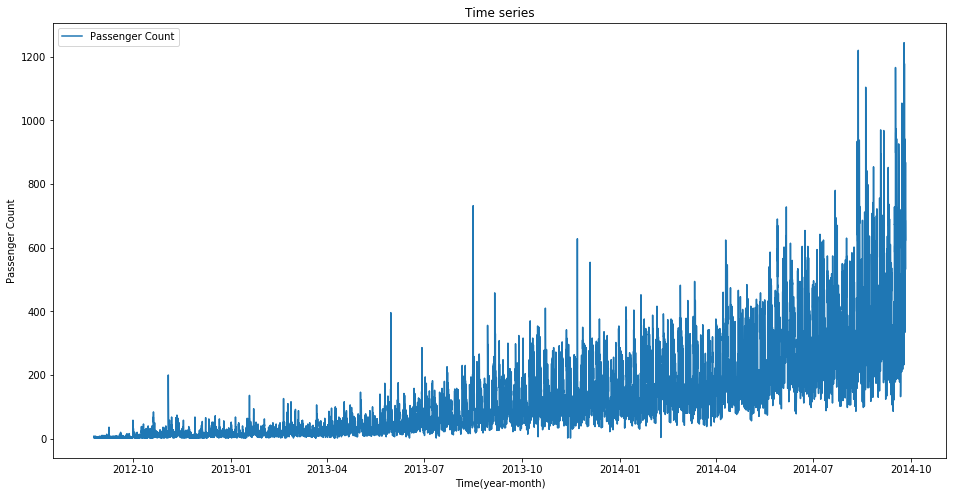

In [60]:
train.index = train['Datetime'] #indexing the datetime to get the time period on the x-axis

df= train.drop('ID',1) #drop Id Variable to get only the Datetime on x-axis 

ts= df['Count']

# plot the count Vs Datetime time to check the trends 
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.


## Exploratory Analysis

Our First hypothesis was traffic will increase as the years pass by. So let's look at yearly passenger count

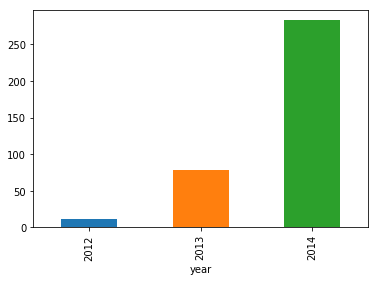

In [61]:
train.groupby('year')['Count'].mean().plot.bar()

Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

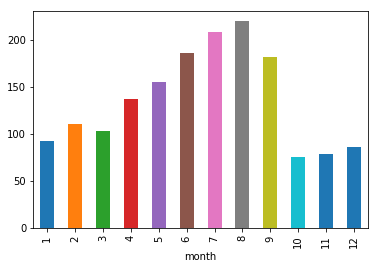

In [62]:
train.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger Count in last three Months.
Now let's look at the monthly mean of each year separately.

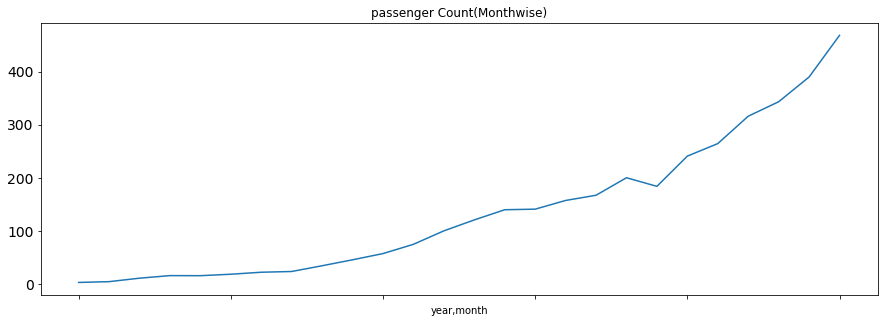

In [63]:
temp= train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title='passenger Count(Monthwise)',fontsize=14)

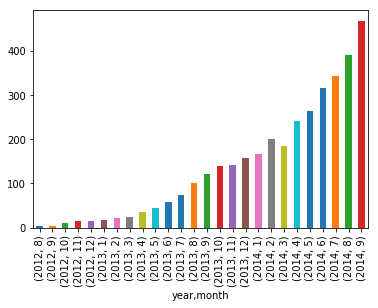

In [64]:
temp.plot.bar()

In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let's look at the daily mean of passenger Count.


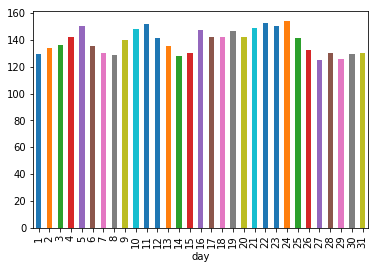

In [65]:
train.groupby('day')['Count'].mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

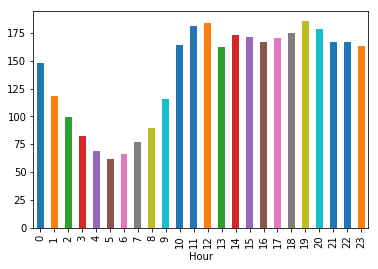

In [66]:
train.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.
Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

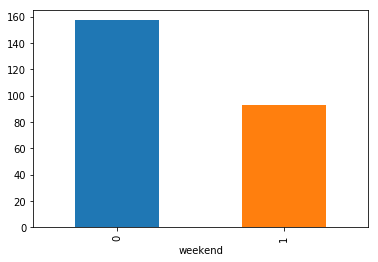

In [67]:
train.groupby('weekend')['Count'].mean().plot.bar()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

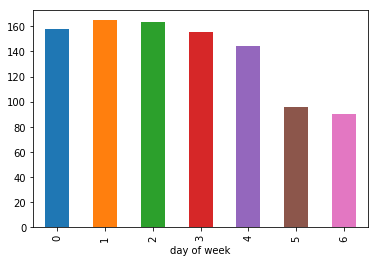

In [68]:
train.groupby('day of week')['Count'].mean().plot.bar()

<li>
Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.<li>From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [69]:
train=train.drop('ID',1)

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [70]:
train['Timestamp'] = pd.to_datetime(train.Datetime, format='%d-%m-%y %H:%M')
train.index = train.Timestamp

#Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

#Converting to weekly mean 
weekly = train.resample('W').mean()

#converting to monthly mean
monthly = train.resample('M').mean()

Let's look at hourly, daily, weekly, monthly time series.

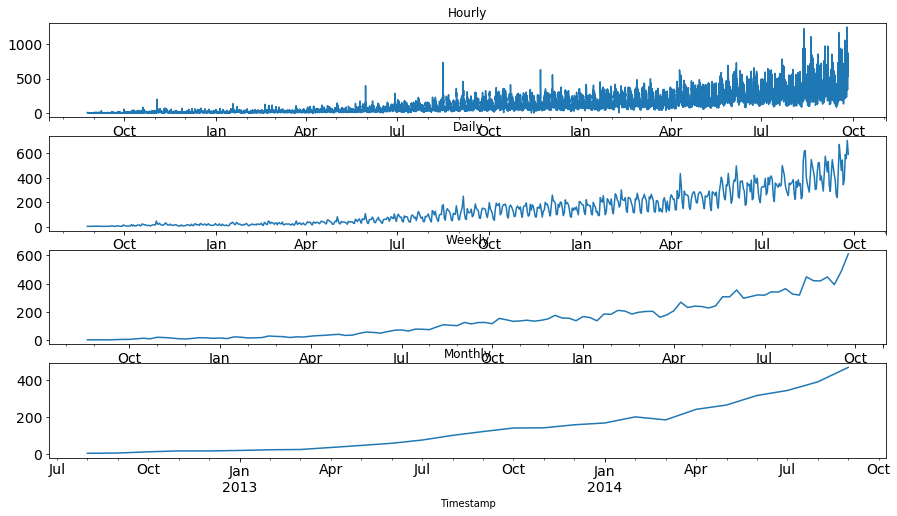

In [71]:
fig, axs= plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='Monthly', fontsize=14, ax=axs[3])
plt.show()


We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

# Forecasting Using Multiple Modelling Techniques

In [72]:
Train=train['2012-08-25':'2014-06-24']
valid=train['2014-06-25':'2014-09-25']

Now we will look at how the train and validation part has been divided.

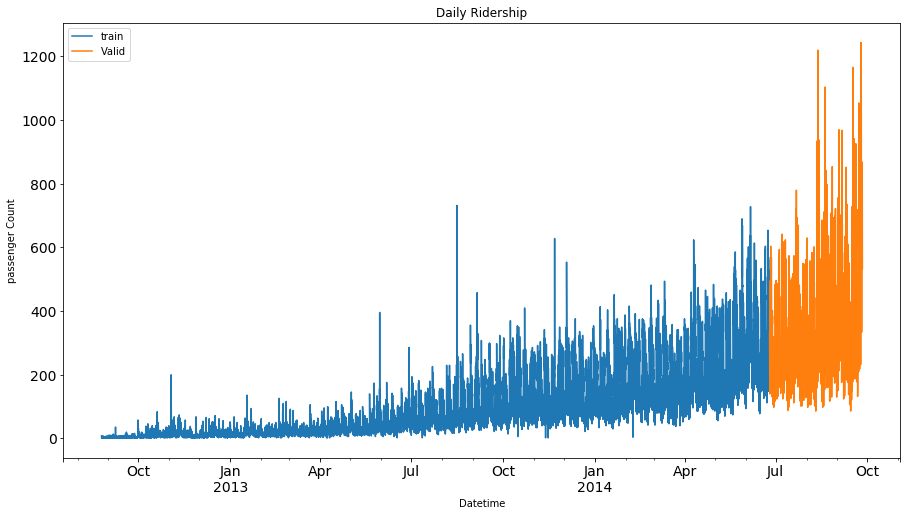

In [73]:
Train.Count.plot(figsize=(15,8),title= 'Daily Ridership', fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14, label='Valid')
plt.xlabel("Datetime")
plt.ylabel("passenger Count")
plt.legend(loc='best')
plt.show()

## Modeling techniques
<br>We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

<li>i) Naive Approach
<li>ii) Moving Average
<li>iii) Simple Exponential Smoothing
<li>iv) Holt’s Linear Trend Model
We will discuss each of these methods in detail now.

## i) Naive Approach
<li>In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction

Let's make predictions using naive approach for validation sets.

In [74]:
dd= np.asarray(Train.Count)
valid.head()


,Datetime,Count,year,month,day,Hour,day of week,weekend,Timestamp
Timestamp,,,,,,,,,
2014-06-25 00:00:00,2014-06-25 00:00:00,332,2014,6,25,0,2,0,2014-06-25 00:00:00
2014-06-25 01:00:00,2014-06-25 01:00:00,260,2014,6,25,1,2,0,2014-06-25 01:00:00
2014-06-25 02:00:00,2014-06-25 02:00:00,218,2014,6,25,2,2,0,2014-06-25 02:00:00
2014-06-25 03:00:00,2014-06-25 03:00:00,244,2014,6,25,3,2,0,2014-06-25 03:00:00
2014-06-25 04:00:00,2014-06-25 04:00:00,168,2014,6,25,4,2,0,2014-06-25 04:00:00


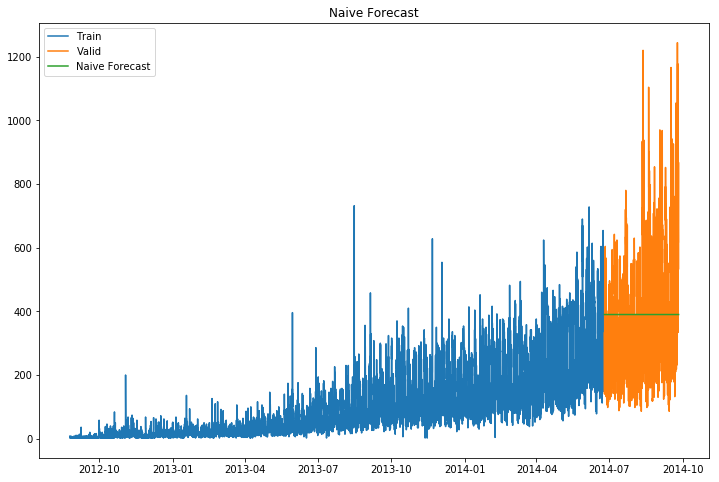

In [75]:
y_hat =valid.copy()
y_hat['naive'] = dd[len(dd)-1] # create new column called Naive and set all it's value to last entry of valid.Count
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

<li>We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
<li>rmse is the standard deviation of the residuals.
<li>Residuals are a measure of how far from the regression line data points are.
<li>The formula for rmse is:
    



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>r</mi>
  <mi>m</mi>
  <mi>s</mi>
  <mi>e</mi>
  <mo>=</mo>
  <mi>s</mi>
  <mi>q</mi>
  <mi>r</mi>
  <mi>t</mi>
  <mrow class="MJX-TeXAtom-ORD">
    <munderover>
      <mo>&#x2211;<!-- ∑ --></mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mi>i</mi>
        <mo>=</mo>
        <mn>1</mn>
      </mrow>
      <mi>N</mi>
    </munderover>
    <mfrac>
      <mn>1</mn>
      <mi>N</mi>
    </mfrac>
    <mo stretchy="false">(</mo>
    <mi>p</mi>
    <mo>&#x2212;<!-- − --></mo>
    <mi>a</mi>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>2</mn>
    </msup>
  </mrow>
</math>

We will now calculate RMSE to check the accuracy of our model on validation data set.

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)

186.37368520699056


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

## ii) Moving Average
<li>In this technique we will take the average of the passenger counts for last few time periods only.
    <li>Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

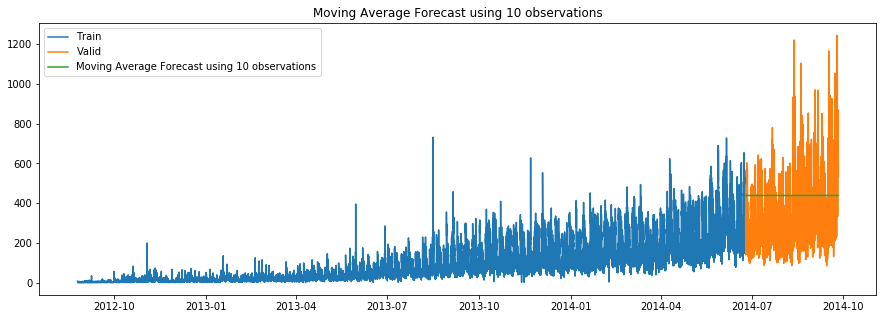

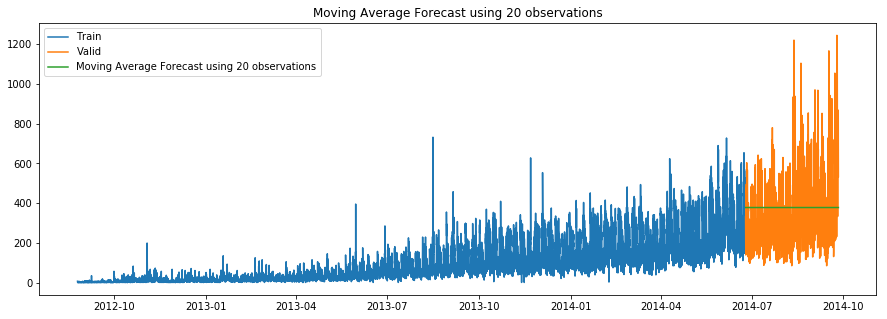

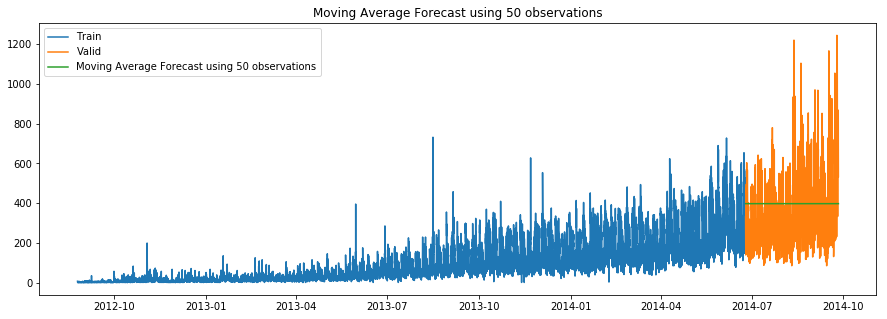

In [77]:
y_hat_avg = valid.copy()
# Average of last 10 Observation 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.title("Moving Average Forecast using 10 observations")
plt.show()


# Average of last 20 Observation 
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] 
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.title("Moving Average Forecast using 20 observations")
plt.show()

# Average of last 50 Observation 
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] 
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.title("Moving Average Forecast using 50 observations")
plt.show()






We took the average of last 10, 20 and 50 observations and predicted based on that. This value can be changed in the above code in .rolling().mean() part. We can see that the predictions are getting weaker as we increase the number of observations.

In [78]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
print(rms)

186.5773761711873


## iii) Simple Exponential Smoothing
<li>In this technique, we assign larger weights to more recent observations than to observations from the distant past.
<li>The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

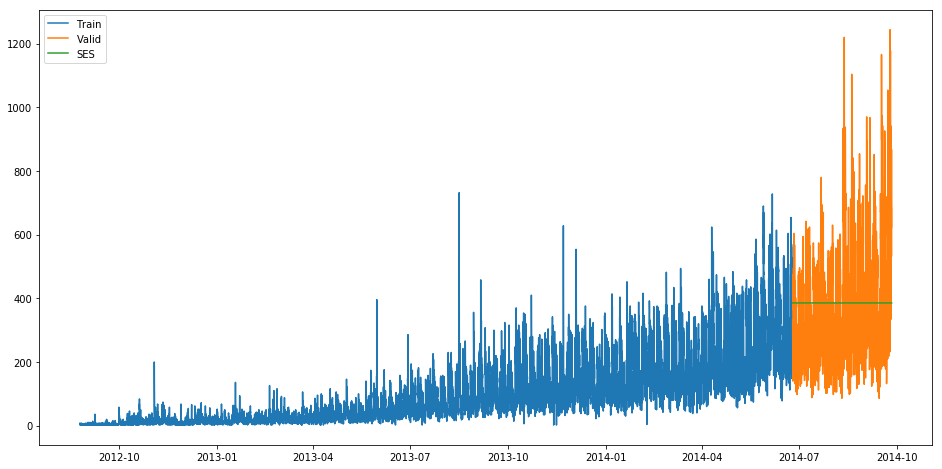

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [80]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

186.40944652452376


We can infer that the fit of the model has improved as the rmse value has reduced.

## iv) Holt’s Linear Trend Model
<li>It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
<li>This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.
<br>
We can decompose the time series in four parts.
<br>
<li>Observed, which is the original time series.
<li>Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
<li>Seasonal, which tells us about the seasonality in the time series.
<li>Residual, which is obtained by removing any trend or seasonality in the time series.
Lets visualize all these parts.

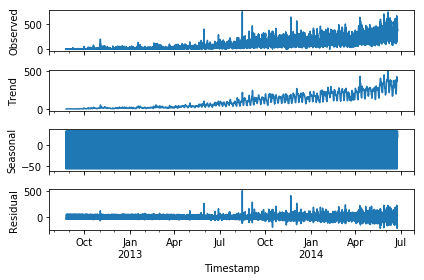

In [81]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

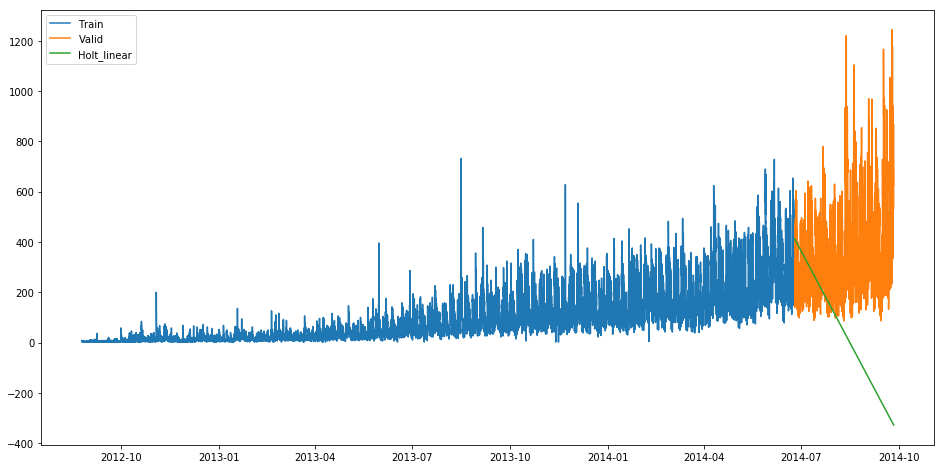

In [88]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


We can see an inclined line here as the model has taken into consideration the trend of the time series.

Let’s calculate the rmse of the model.


In [89]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

475.09398202897876


It can be inferred that the rmse value has decreased.

## Holt’s Linear Trend Model on daily time series
<li>Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
<li>We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
<li>We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.

In [94]:
submission = pd.read_csv("submission.csv")
predict=fit1.forecast(len(test))
test['prediction']=predict

Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day.
* Then we will find the average ratio of passenger count for every hour and we will get 24 ratios.
* Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [ ]:
#Caluating the hourly ratio of Count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

#Grouping the hourly Ratio
temp = train_original.groupby(['Hour'])['ratio'].sum()

# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2= temp2.drop('Hour.1',1)

#Merge Test and test_original on day, month and year
merge = pd.merge(test, test_original, on = ('day','month','year' ),how='left')
merge['Hour']= merge['Hour_y']
merge=merge.drop(['year','month','Hour_x','Hour_y'],axis=1)

#Prediction by merging merge and temp2
prediction = pd.merge(merge, temp2, on='Hour',how='left')

#Converting the ratio to the original scale 
prediction['Count']= prediction['prediction'] * prediction['ratio'] * 24
prediction['ID']=prediction['ID_y']

In [ ]:
#Let’s drop all other features from the submission file and keep ID and Count only.

submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

## 4) Holt winter’s model on daily time series
Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

Let’s first fit the model on training dataset and validate it using the validation dataset.

In [ ]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

We can see that the rmse value has reduced a lot from this method. Let’s forecast the Counts for the entire length of the Test dataset.

In [ ]:
predict=fit1.forecast(len(test))

Now we will convert these daily passenger count into hourly passenger count using the same approach which we followed above.

In [ ]:
test['prediction']=predict